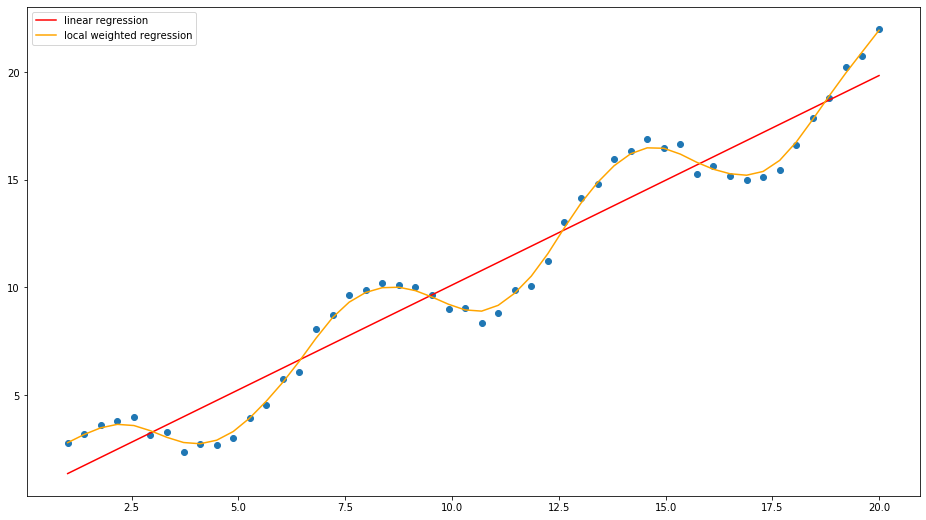

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def build_weights(x, dataset, tau=0.5):
    return np.diag(np.exp(-((x - dataset) ** 2) / (2 * tau ** 2)))

def normal_equation(x, y, w=None):
    if w is None:
        return np.linalg.inv(x.T @ x) @ x.T @ y
    else:
        return np.linalg.inv(x.T @ w @ x) @ x.T @ w @ y


x = np.linspace(1, 20)
y = x + 2 * np.sin(x) + 0.3 * np.random.randn(len(x))

xx = np.c_[np.ones(len(x)), x]
yy = np.reshape(y, (-1, 1))

theta_linear = normal_equation(xx, yy).flatten()
y_hat_linear = theta_linear[0] + theta_linear[1] * x

y_hat_weighted = []
for point in x:
    w = build_weights(point, x)
    theta = normal_equation(xx, yy, w).flatten()
    y_hat_weighted.append(theta[0] + theta[1] * point)

plt.figure(figsize=(16, 9))
plt.scatter(x, y)

# plot the linear regression
plt.plot(x, y_hat_linear, color='red', label='linear regression')
# plot the locally weighted regression
plt.plot(x, y_hat_weighted, color='orange', label='local weighted regression')
plt.legend()